# Project: Wrangle WeRateDogs




## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Data gathering">Data gathering</a></li>
<li><a href="#Data assessing">Data assessing</a></li>
<li><a href="#Data cleaning">Data cleaning</a></li>
<li><a href="#Data storing"> Data storing</a></li>
<li><a href="#Analyzing and visualizing data">Analyzing and visualizing data</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset that we will be wrangling analyzing and visualizing is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. WeRateDogs has over 9.2 million followers and has received international media coverage.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import seaborn as sns
import datetime

# Style and size of graph
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,8)})

<a id='Data gathering'></a>
## Step 1: Data gathering

The data we need to gather is:
- Enhanced Twitter Archive
- Image Predictions File
- Additional Data via the Twitter API

### 1.1 : Enhanced Twitter Archive
WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for students to use in their projects. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 2000+ of their tweets as they stood on August 1, 2017.

In [2]:
#Gathering the twitter-archive-enhanced.csv file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 1.2: Image Predictions File
This file contiain every image in the WeRateDogs Twitter archive ran through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).
we will get this file from udacity 

In [3]:
# Download the image predictions TSV(Tab separated file) file using requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Import the tweet image predictions TSV file into a DataFrame
df_image = pd.read_csv('image_predictions.tsv', sep='\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 1.3: Additional Data via the Twitter API
Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But because we have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 2000+. we are going to query Twitter's API to gather this valuable data.

In [ ]:
#Documentation about twitter API:https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/overview/tweet-object
#consumer_key = 'YOUR KEY'
#consumer_secret = 'YOUR KEY'
#access_token = 'YOUR KEY'
#access_secret = 'YOUR KEY'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
# Use Twitter API to collect our data 
#tweet_ids = list(twitter_archive['tweet_id'])

#tweet_data = []
#tweet_id_success = []
#tweet_id_missing = []
#for tweet_id in tweet_ids:
#    try:
#        data = api.get_status(tweet_id, 
#                              tweet_mode='extended',
 #                             wait_on_rate_limit = True,
  #                            wait_on_rate_limit_notify = True)
   #     tweet_data.append(data._json)
    #    tweet_id_success.append(tweet_id)
    #except:
     #   tweet_id_missing.append(tweet_id)
      #  print(tweet_id)

In [ ]:
# Write tweet data to json file
#with open('tweet_json.txt', mode = 'w') as file:
 #   json_content = tweet_data
  #  json.dump(json_content, file)

In [4]:
df_api = pd.read_json('tweet_json.txt', lines = True)
df_api.head()

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,33829,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,29340,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,22070,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,36953,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,35324,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [5]:
#Setting our columns of interest for the API data
df_api = df_api[['id', 'favorite_count', 'retweet_count']]
df_api.head()

,id,favorite_count,retweet_count
0,892420643555336193,33829,7010
1,892177421306343426,29340,5302
2,891815181378084864,22070,3482
3,891689557279858688,36953,7228
4,891327558926688256,35324,7765


In [6]:
df_api.shape

(2324, 3)

>We finished the data gathering with three data frames: `twitter_archive`, `image_predictions`, `api_data`, now we will move to assessing the data we got.

<a id='Data assessing'></a>
## Step 2: Data assessing #

we will search for issues in two aspect: quality and tidiness, and i will document them in the end of this section

In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Twitter_archive columns:**

- tweet_id: the unique identifier for each tweet
- in_reply_to_status_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
- timestamp: time when this Tweet was created
- source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
- text: actual UTF-8 text of the status update
- retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
- retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
- retweeted_status_timestamp: time of retweet
- expanded_urls: tweet URL
- rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10
- rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
- name: name of the dog
- doggo: one of the 4 dog "stage"
- floofer: one of the 4 dog "stage"
- pupper: one of the 4 dog "stage"
- puppo: one of the 4 dog "stage"

In [9]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
885,760153949710192640,NaN,NaN,2016-08-01 16:43:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @hownottodraw: The story/person behind @dog...,7.601538e+17,1.950368e+08,2016-08-01 16:42:51 +0000,"https://weratedogs.com/pages/about-us,https://...",11,10,None,None,None,None,None
1301,707629649552134146,NaN,NaN,2016-03-09 18:10:30 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We usually don't rate marshmallows but this on...,NaN,NaN,NaN,https://vine.co/v/iHhBOTl5p9z,10,10,None,None,None,None,None
773,776249906839351296,NaN,NaN,2016-09-15 02:42:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. Pls stop sen...,7.007478e+17,4.196984e+09,2016-02-19 18:24:26 +0000,https://twitter.com/dog_rates/status/700747788...,11,10,very,None,None,None,None
2060,671182547775299584,NaN,NaN,2015-11-30 04:22:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup holds the secrets of the universe in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671182547...,12,10,None,None,None,None,None
2198,668815180734689280,NaN,NaN,2015-11-23 15:35:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a wild Toblerone from Papua New Guinea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668815180...,7,10,a,None,None,None,None


In [10]:
#Checking the numbers of duplicated rows
print(sum(twitter_archive.duplicated())),print(sum(twitter_archive.tweet_id.duplicated()))

0
0


(None, None)

In [11]:
#Checking the number of unique values
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [12]:
#Let's look if there are any denominator value that are not 10
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [13]:
# Sort by rating_denominator values
twitter_archive.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [14]:
# How many of the observation are retweet. This data will need to be dropped later
len(twitter_archive[twitter_archive.retweeted_status_id.isnull() == False])

181

In [15]:
#Let's check how many values in twitter_archive.tweet_id don't exist in df_image.tweet_id
len(twitter_archive[twitter_archive.tweet_id.isin(df_image.tweet_id)]),len(twitter_archive[~twitter_archive.tweet_id.isin(df_image.tweet_id)])

(2075, 281)

In [16]:
#let's check if some entries have more than one dog stage
len(twitter_archive[(twitter_archive['doggo'] == 'doggo' ) & (twitter_archive['pupper'] == 'pupper')])

12

In [17]:
len(twitter_archive[(twitter_archive['puppo'] != 'None' ) & (twitter_archive['floofer'] != 'None')])

0

In [18]:
len(twitter_archive[(twitter_archive['doggo'] != 'None' ) & (twitter_archive['floofer'] != 'None')])

1

In [19]:
len(twitter_archive[(twitter_archive['doggo'] == 'doggo' ) & (twitter_archive['puppo'] == 'puppo')])

1

In [20]:
len(twitter_archive[(twitter_archive['pupper'] != 'None' ) & (twitter_archive['puppo'] == 'puppo')])

0

In [21]:
len(twitter_archive[(twitter_archive['pupper'] != 'None' ) & (twitter_archive['floofer'] != 'None')])

0

In [22]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
df_image.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [24]:
df_api.nunique()

id                2324
favorite_count    1983
retweet_count     1660
dtype: int64

**Quality:**
>
> contains retweets and therefore, duplicates
>
> rating_denominator column has values other than 10
>
> some records have more than one dog stage
>
> We need to fix the date format
>
> many tweet_id(s) of twitter_archive table are missing in df_img (image predictions) table
>
> unnecessary html tags in source column in place of utility name e.g. ["Twitter for iPhone"](http://twitter.com/download/iphone)  
>
> rating_numerator column has values less than 10 as well as some very large numbers (e.g. 1176). We are going to prorate them.
>
> erroneous dog names starting with lowercase characters (e.g. a, an, actually, by)

**Tidy:**
>
> We need to merge, join, concat our 3 datasets 
> 
> We need to reorganize the prediction and confidence columns to have something clearer

<a id='Data cleaning'></a>
## Step 3: Data cleaning #

The last step in the Data Wrangling process is we clean the issues we document in data assessing, first we will handle the missing data issue, thin the tidiness issues, lastly the rest of quality issues

In [25]:
#Let's create some copy of our original datasets
twitter_copy = twitter_archive.copy()
img_copy = df_image.copy()
api_copy = df_api.copy()

**1 - Define:** We are going to drop the retweeted lines in our twitter_archive dataframe (181 lines)

In [26]:
twitter_copy = twitter_copy[twitter_copy['retweeted_status_user_id'].isnull()]

In [27]:

len(twitter_copy[twitter_copy['retweeted_status_user_id'].isnull() == False])

0

In [28]:
twitter_copy.shape

(2175, 17)

**Let's now remove the retweet columns since they are now empty:**

In [29]:
twitter_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)
twitter_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


**2 - Define:** 
We need to keep in twitter_archive the tweet_id existing in df_image. We can drop the other ones

In [30]:
twitter_copy = twitter_copy[twitter_copy.tweet_id.isin(img_copy.tweet_id)]

In [31]:
twitter_copy.shape

(1994, 12)

In [32]:
twitter_copy.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


**3 - Define:**
Let's change the data format from object to date time format, and then let's separate both the date part and time part of this

In [33]:
# Creating a function to change object to datetime
def object_to_datetime(str):
    return pd.to_datetime(str)

In [34]:
twitter_copy['timestamp'] = twitter_copy['timestamp'].apply(object_to_datetime)

In [35]:
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1994 non-null   object             
 8   doggo               1994 non-null   object             
 9   floofer             1994 non-null   object             
 10  pupper              1994 non-null   object             
 11  puppo               1994 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [36]:
# extracting date from timestamp
twitter_copy['Date'] = [datetime.datetime.date(d) for d in twitter_copy['timestamp']] 

# extracting time from timestamp
twitter_copy['Time'] = [datetime.datetime.time(d) for d in twitter_copy['timestamp']] 

In [37]:
twitter_copy.drop(['Time'], axis=1, inplace=True)

In [38]:
twitter_copy.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Date
1897,674737130913071104,2015-12-09 23:47:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rufio. He is unaware of the pink legless ...,https://twitter.com/dog_rates/status/674737130...,10,10,Rufio,None,None,pupper,None,2015-12-09
2150,669683899023405056,2015-11-26 01:07:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kloey. Her mother was a unicorn. 10/10...,https://twitter.com/dog_rates/status/669683899...,10,10,Kloey,None,None,None,None,2015-11-26
2039,671547767500775424,2015-12-01 04:33:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Marley. She chews shoes then feels ext...,https://twitter.com/dog_rates/status/671547767...,10,10,Marley,None,None,None,None,2015-12-01


In [39]:
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1994 non-null   object             
 8   doggo               1994 non-null   object             
 9   floofer             1994 non-null   object             
 10  pupper              1994 non-null   object             
 11  puppo               1994 non-null   object             
 12  Date                1994 non-null 

In [40]:
twitter_copy.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Date
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31


**4 - Define:**
Some entries have multiple dog stages which needs to be cleaned before melting these 4 columns into one.

In [41]:
print(len(twitter_copy[(twitter_copy['pupper'] != 'None' ) & (twitter_copy['doggo'] != 'None')]))
print(len(twitter_copy[(twitter_copy['puppo'] != 'None' ) & (twitter_copy['doggo'] != 'None')]))
print(len(twitter_copy[(twitter_copy['doggo'] != 'None' ) & (twitter_copy['floofer'] != 'None')]))

9
1
1


In [42]:
#I arbitrarily decide to change and replace the 9 entries of doggo and pupper to just doggo
twitter_copy['pupper'][(twitter_copy['doggo'] == 'doggo' ) & (twitter_copy['pupper'] == 'pupper')] = 'None'

C:\Users\Nigussie\AppData\Local\Temp\ipykernel_11748\1240824337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_copy['pupper'][(twitter_copy['doggo'] == 'doggo' ) & (twitter_copy['pupper'] == 'pupper')] = 'None'


In [43]:
list(twitter_copy[(twitter_copy['doggo'] != 'None' ) & (twitter_copy['floofer'] != 'None')]['text'])

["At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"]

In [44]:
twitter_copy['doggo'][(twitter_copy['doggo'] != 'None' ) & (twitter_copy['floofer'] != 'None')] = 'None'

C:\Users\Nigussie\AppData\Local\Temp\ipykernel_11748\1771895613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_copy['doggo'][(twitter_copy['doggo'] != 'None' ) & (twitter_copy['floofer'] != 'None')] = 'None'


In [45]:
list(twitter_copy[(twitter_copy['doggo'] != 'None' ) & (twitter_copy['puppo'] != 'None')]['text'])

["Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"]

In [46]:
twitter_copy['doggo'][(twitter_copy['doggo'] != 'None' ) & (twitter_copy['puppo'] != 'None')] = 'None'
#twitter_copy.loc[(twitter_copy['doggo'] != 'None' ) & (twitter_copy['puppo'] != 'None')] = 'None'

C:\Users\Nigussie\AppData\Local\Temp\ipykernel_11748\2581774193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_copy['doggo'][(twitter_copy['doggo'] != 'None' ) & (twitter_copy['puppo'] != 'None')] = 'None'


**Test:**

In [47]:
print(len(twitter_copy[(twitter_copy['pupper'] != 'None' ) & (twitter_copy['doggo'] != 'None')]))
print(len(twitter_copy[(twitter_copy['puppo'] != 'None' ) & (twitter_copy['doggo'] != 'None')]))
print(len(twitter_copy[(twitter_copy['doggo'] != 'None' ) & (twitter_copy['floofer'] != 'None')]))

0
0
0


**5 - Define:** One column 'Stage' should be merging the column doggo, floofer, pupper and puppo

In [48]:
twitter_copy['stage'] = twitter_copy[['doggo', 'floofer', 'pupper', 'puppo']].agg(''.join, axis=1)
twitter_copy['stage'].replace('NoneNoneNoneNone', 'None', inplace=True)
twitter_copy['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
twitter_copy['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
twitter_copy['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
twitter_copy['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)
twitter_copy.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Date,stage
1367,702598099714314240,2016-02-24 20:56:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sansa. She's gotten too big for her ch...,https://twitter.com/dog_rates/status/702598099...,11,10,Sansa,None,None,pupper,None,2016-02-24,pupper
769,777189768882946048,2016-09-17 16:57:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He's being held so he doesn't...,https://twitter.com/dog_rates/status/777189768...,12,10,Jeffrey,None,None,None,None,2016-09-17,None
1353,703769065844768768,2016-02-28 02:29:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you're trying to watch your favorite tv s...,https://twitter.com/dog_rates/status/703769065...,10,10,None,None,None,None,None,2016-02-28,None


In [49]:

twitter_copy[['doggo', 'floofer', 'pupper', 'puppo', 'stage']].sample(10)

,doggo,floofer,pupper,puppo,stage
2022,None,None,None,None,None
164,None,None,None,None,None
1667,None,None,None,None,None
163,None,None,None,None,None
722,None,None,None,None,None
1950,None,None,None,None,None
983,None,None,None,None,None
473,None,None,None,None,None
2352,None,None,None,None,None
1715,None,None,None,None,None


In [50]:
twitter_copy.groupby(['stage']).agg(tweets=('tweet_id', 'count'))

,tweets
stage,
None,1688
doggo,72
floofer,8
pupper,203
puppo,23


In [51]:
twitter_copy.drop(['doggo', 'pupper','puppo', 'floofer'], axis=1, inplace=True)
twitter_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Date,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,None


**6 - Define:**
We need to extract text from the Source column in order to better see on which device users accessed to Twitter for their post.

In [52]:
print(twitter_copy.iloc[0].source)
print(twitter_copy.iloc[1].source)
print(twitter_copy.iloc[2].source)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>


In [53]:
twitter_copy.source = twitter_copy.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

C:\Users\Nigussie\AppData\Local\Temp\ipykernel_11748\2520297481.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_copy.source = twitter_copy.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')


In [54]:
twitter_copy.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

**7 - Define:**
We have to change the denominator which are not 10 in order to have consistency. We also need to prorate numerators

In [55]:
twitter_copy.rating_denominator.value_counts()

10     1976
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
130       1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

In [56]:
twitter_copy.rating_numerator.value_counts()

12      450
10      419
11      396
13      261
9       151
8        95
7        52
14       35
5        33
6        32
3        19
4        16
2         9
1         5
0         2
45        1
144       1
88        1
26        1
121       1
143       1
44        1
60        1
165       1
80        1
99        1
50        1
204       1
1776      1
27        1
75        1
24        1
84        1
420       1
Name: rating_numerator, dtype: int64

In [57]:
twitter_copy['rating_denominatorbis'] = 10
twitter_copy['rating_numeratorbis'] = np.where(twitter_copy.rating_denominator == 0 , 10,
         (np.where(twitter_copy.rating_denominator != 10, ((twitter_copy['rating_numerator']*10)/twitter_copy['rating_denominator']),twitter_copy.rating_numerator)))

In [58]:
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   timestamp              1994 non-null   datetime64[ns, UTC]
 2   source                 1994 non-null   object             
 3   text                   1994 non-null   object             
 4   expanded_urls          1994 non-null   object             
 5   rating_numerator       1994 non-null   int64              
 6   rating_denominator     1994 non-null   int64              
 7   name                   1994 non-null   object             
 8   Date                   1994 non-null   object             
 9   stage                  1994 non-null   object             
 10  rating_denominatorbis  1994 non-null   int64              
 11  rating_numeratorbis    1994 non-null   float64          

In [59]:
twitter_copy['rating_numeratorbis'] = np.where(twitter_copy.rating_numeratorbis.astype(float) < 10, twitter_copy.rating_numeratorbis.astype(str).str.pad(2, fillchar='1'), twitter_copy.rating_numeratorbis)
twitter_copy.rating_numeratorbis.head(3)

0    13.0
1    13.0
2    12.0
Name: rating_numeratorbis, dtype: object

In [60]:
twitter_copy['rating_numeratorbis'] = twitter_copy.rating_numeratorbis.astype(float)
twitter_copy['rating_numeratorbis'] = twitter_copy.rating_numeratorbis.astype(int)

In [61]:
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   timestamp              1994 non-null   datetime64[ns, UTC]
 2   source                 1994 non-null   object             
 3   text                   1994 non-null   object             
 4   expanded_urls          1994 non-null   object             
 5   rating_numerator       1994 non-null   int64              
 6   rating_denominator     1994 non-null   int64              
 7   name                   1994 non-null   object             
 8   Date                   1994 non-null   object             
 9   stage                  1994 non-null   object             
 10  rating_denominatorbis  1994 non-null   int64              
 11  rating_numeratorbis    1994 non-null   int32            

In [62]:
twitter_copy.drop(['rating_denominator', 'rating_numerator'], axis=1, inplace=True)
twitter_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,Date,stage,rating_denominatorbis,rating_numeratorbis
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,2017-08-01,None,10,13


In [63]:
#Renaming Columns 
twitter_copy.rename(columns={'rating_denominatorbis': 'rating_denominator', 'rating_numeratorbis': 'rating_numerator'}, inplace=True)

In [64]:
twitter_copy.rating_denominator.value_counts(),twitter_copy.rating_numerator.value_counts()

(10    1994
 Name: rating_denominator, dtype: int64,
 12      454
 10      421
 11      402
 13      261
 9       151
 8        96
 7        51
 14       35
 5        34
 6        33
 3        19
 4        15
 2        10
 1         4
 0         2
 26        1
 27        1
 1776      1
 75        1
 34        1
 420       1
 Name: rating_numerator, dtype: int64)

In [65]:
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   name                1994 non-null   object             
 6   Date                1994 non-null   object             
 7   stage               1994 non-null   object             
 8   rating_denominator  1994 non-null   int64              
 9   rating_numerator    1994 non-null   int32              
dtypes: datetime64[ns, UTC](1), int32(1), int64(2), object(6)
memory usage: 163.6+ KB


**8 - Define:**
We need to merge the 3 datasets in order to make our EDA (Data Viz & Insight) easier to compute.

In [66]:
merged_df = pd.merge(twitter_copy, img_copy, on='tweet_id')

In [67]:
merged_df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,name,Date,stage,rating_denominator,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,2017-08-01,None,10,13,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,2017-08-01,None,10,13,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,2017-07-31,None,10,12,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [68]:
merged_df = pd.merge(merged_df, api_copy, left_on='tweet_id', right_on='id')
merged_df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,name,Date,stage,rating_denominator,rating_numerator,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,2017-08-01,None,10,13,...,False,bagel,0.085851,False,banana,0.076110,False,892420643555336193,33829,7010
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,2017-08-01,None,10,13,...,True,Pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,29340,5302
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,2017-07-31,None,10,12,...,True,malamute,0.078253,True,kelpie,0.031379,True,891815181378084864,22070,3482


In [69]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1984 non-null   int64              
 1   timestamp           1984 non-null   datetime64[ns, UTC]
 2   source              1984 non-null   object             
 3   text                1984 non-null   object             
 4   expanded_urls       1984 non-null   object             
 5   name                1984 non-null   object             
 6   Date                1984 non-null   object             
 7   stage               1984 non-null   object             
 8   rating_denominator  1984 non-null   int64              
 9   rating_numerator    1984 non-null   int32              
 10  jpg_url             1984 non-null   object             
 11  img_num             1984 non-null   int64              
 12  p1                  1984 non-null 

**9 - Define:**
Improve the readability of the predictions

In [70]:
# store the true algo with it's level of confidence and if false put NaN as confidence
prediction = []
confidence = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        confidence.append(dataframe['p3_conf'])
    else:
        prediction.append(np.nan)
        confidence.append(0)

merged_df.apply(get_prediction_confidence, axis=1)
merged_df['breed'] = prediction
merged_df['confidence'] = confidence

In [77]:
merged_df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,Date,stage,rating_denominator,rating_numerator,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,favorite_count,retweet_count,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,2017-08-01,None,10,13,...,0.085851,False,banana,0.076110,False,892420643555336193,33829,7010,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,2017-08-01,None,10,13,...,0.090647,True,papillon,0.068957,True,892177421306343426,29340,5302,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,2017-07-31,None,10,12,...,0.078253,True,kelpie,0.031379,True,891815181378084864,22070,3482,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,2017-07-30,None,10,13,...,0.168086,True,spatula,0.040836,False,891689557279858688,36953,7228,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,2017-07-29,None,10,12,...,0.225770,True,German_short-haired_pointer,0.175219,True,891327558926688256,35324,7765,basset,0.555712


In [71]:
sum(merged_df.breed.isnull())

308

In [72]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1984 non-null   int64              
 1   timestamp           1984 non-null   datetime64[ns, UTC]
 2   source              1984 non-null   object             
 3   text                1984 non-null   object             
 4   expanded_urls       1984 non-null   object             
 5   name                1984 non-null   object             
 6   Date                1984 non-null   object             
 7   stage               1984 non-null   object             
 8   rating_denominator  1984 non-null   int64              
 9   rating_numerator    1984 non-null   int32              
 10  jpg_url             1984 non-null   object             
 11  img_num             1984 non-null   int64              
 12  p1                  1984 non-null 

**10 - Define:** Let's clean our dataset to have just useful columns for our analysis

In [73]:
merged_df.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'id', 'img_num', 'jpg_url'], axis=1, inplace=True)

In [74]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1984 non-null   int64              
 1   timestamp           1984 non-null   datetime64[ns, UTC]
 2   source              1984 non-null   object             
 3   text                1984 non-null   object             
 4   expanded_urls       1984 non-null   object             
 5   name                1984 non-null   object             
 6   Date                1984 non-null   object             
 7   stage               1984 non-null   object             
 8   rating_denominator  1984 non-null   int64              
 9   rating_numerator    1984 non-null   int32              
 10  favorite_count      1984 non-null   int64              
 11  retweet_count       1984 non-null   int64              
 12  breed               1676 non-null 

**11 - Define:** erroneous dog names starting with lowercase characters (e.g. a, an, actually, by). We will replace all lower cases by None

In [75]:
merged_df.loc[merged_df['name'] == merged_df['name'].str.lower(), 'name'] = 'None'

In [76]:
merged_df.name[merged_df.name == 'None'].value_counts()

None    642
Name: name, dtype: int64

In [77]:
# Sort ascending by name to check if there are more names starting with a lowercase alphabet
merged_df.name.value_counts().sort_index(ascending=False)

Zuzu     1
Zooey    1
Zoey     3
Zoe      1
Ziva     1
        ..
Aiden    1
Adele    1
Acro     1
Ace      1
Abby     2
Name: name, Length: 912, dtype: int64

<a id='Data storing'></a>
## Step 4: Data  storing #

In [78]:
merged_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

<a id='Analyzing and visualizing data'></a>
## Step 5: Analyzing, and visualizing data #

**Plotting a basic line of the number of tweets over time will give us insights on how WeRateDogs is trending:**

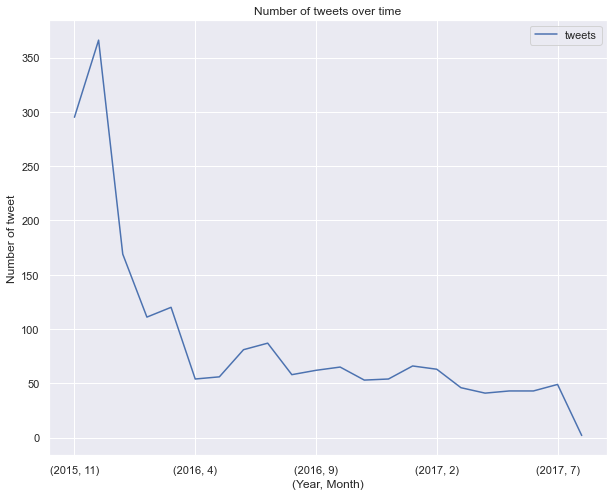

As we can see above, WeRateDogs has been losing momentum over time.
It might be a collateral consequence of Twitter losing users:


In [79]:
merged_df.groupby([merged_df["timestamp"].dt.year, merged_df["timestamp"].dt.month]).agg(tweets=('tweet_id', 'count')).plot()
plt.title('Number of tweets over time')
plt.ylabel('Number of tweet')
plt.xlabel('(Year, Month)')
plt.show()
print('As we can see above, WeRateDogs has been losing momentum over time.') 
print('It might be a collateral consequence of Twitter losing users:')

**How are retweet and favorite functions doing over time?**

As visible retweet and favorite functions of Twitter dont seem to have followed a strong pattern:


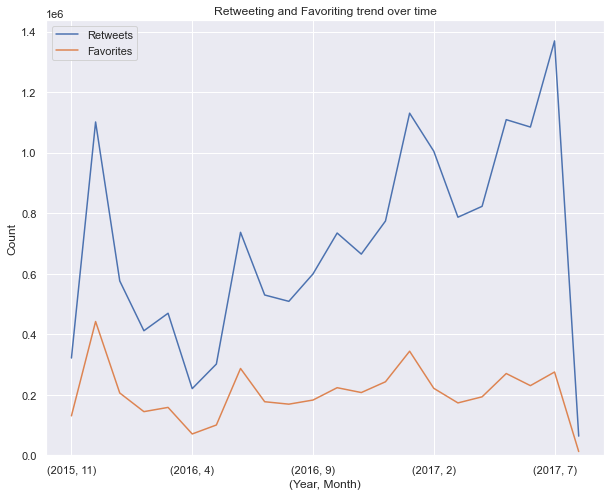

In [80]:
print('As visible retweet and favorite functions of Twitter dont seem to have followed a strong pattern:')
#plt.subplots(1, sharex=True)
merged_df.favorite_count.groupby([merged_df["timestamp"].dt.year, merged_df["timestamp"].dt.month]).sum().plot()
merged_df.retweet_count.groupby([merged_df["timestamp"].dt.year, merged_df["timestamp"].dt.month]).sum().plot().set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')

**What is the most used device for Twitter?**

We can clearly see that most people are using their cellphone device to access to their account:


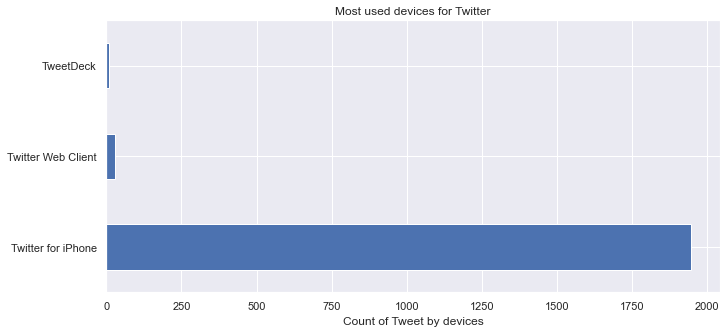

In [81]:
print('We can clearly see that most people are using their cellphone device to access to their account:')
merged_df.source.value_counts().plot(kind='barh',figsize=(11,5), title='Most used devices for Twitter').set_xlabel('Count of Tweet by devices');

**Are there some stages that get more retweet and favorite counts than others?**

Doggo and Pupper seem to be getting most of the retweet and favorite:


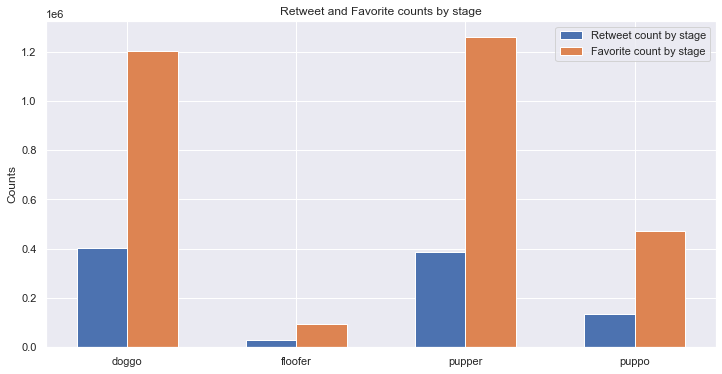

In [82]:
print('Doggo and Pupper seem to be getting most of the retweet and favorite:')
plt1 = merged_df[merged_df['stage'] != 'None'].groupby(['stage'])['retweet_count'].sum()
plt2 = merged_df[merged_df['stage'] != 'None'].groupby(['stage'])['favorite_count'].sum()


# Numbers of pairs of bars you want
N = 4

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.3  

# Plotting
plt.bar(ind, plt1 , width, label='Retweet count by stage')
plt.bar(ind + width, plt2, width, label='Favorite count by stage')

plt.ylabel('Counts')
plt.title('Retweet and Favorite counts by stage')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('doggo', 'floofer', 'pupper', 'puppo'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

**Is there any relationship between the retweeting count and the favoriting count?** 

In [83]:
#Setting up the correlation grid to see the relation between retweets and favorites
print('The correlation grid:')
df_of_interest = merged_df[['retweet_count', 'favorite_count']]
corr = df_of_interest.corr()
corr.style.background_gradient(cmap='coolwarm')

The correlation grid:


,retweet_count,favorite_count
retweet_count,1.000000,0.928391
favorite_count,0.928391,1.000000


**As expected after looking at the scatter plot, the correlation coefficient is very strong (0.9288)**

In [84]:
df_retweet_by_day = merged_df.groupby([merged_df["timestamp"].dt.year, merged_df["timestamp"].dt.month]).agg(retweets=('retweet_count', 'sum'))
df_favorite_by_day = merged_df.groupby([merged_df["timestamp"].dt.year, merged_df["timestamp"].dt.month]).agg(favorites=('favorite_count', 'sum'))

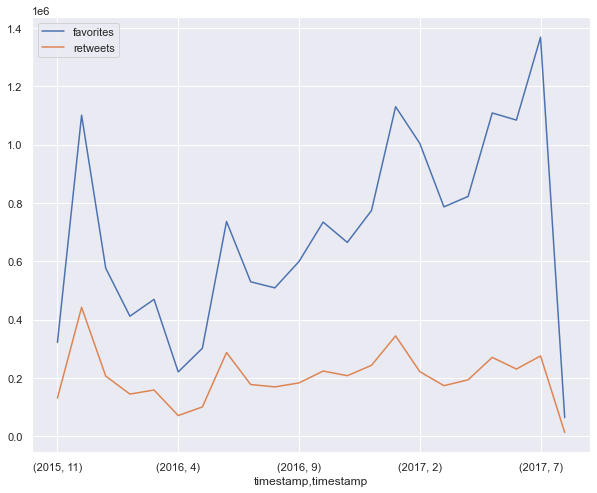

In [85]:
plt0 = df_favorite_by_day.join(df_retweet_by_day)

plt0.plot();